### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

### LOADING DATA

In [4]:
df=pd.read_csv("Breast_cancer_data.csv")

In [5]:
df.shape

(569, 6)

In [6]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


In [8]:
df.diagnosis.unique()

array([0, 1], dtype=int64)

In [9]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

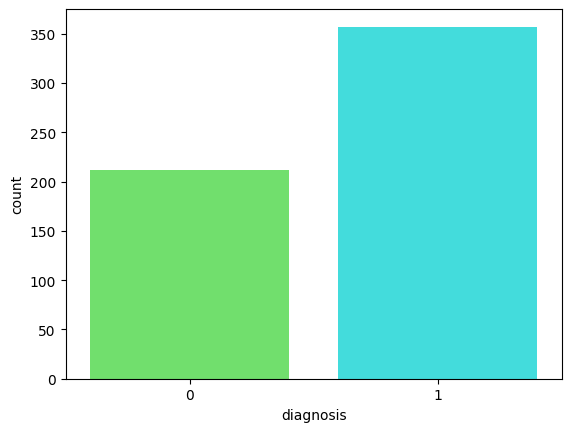

In [10]:
sns.color_palette()
sns.countplot(x=df['diagnosis'],  palette=["#5ff25a",'#2af5f5'])

### Cleaning and Preparing Data

In [11]:
df['diagnosis'] = df['diagnosis'].map({ 'M' : 1 , 'B' : 0})
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,NaN
1,20.57,17.77,132.90,1326.0,0.08474,NaN
2,19.69,21.25,130.00,1203.0,0.10960,NaN
3,11.42,20.38,77.58,386.1,0.14250,NaN
4,20.29,14.34,135.10,1297.0,0.10030,NaN


In [12]:
#check for missing values
df.isnull().sum()

mean_radius          0
mean_texture         0
mean_perimeter       0
mean_area            0
mean_smoothness      0
diagnosis          569
dtype: int64

In [13]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,NaN
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,NaN
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,NaN
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,NaN
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,NaN
diagnosis,NaN,NaN,NaN,NaN,NaN,NaN


#### Inference: mean_radius, mean_perimeter and mean_area have high correlation with malignant tumor

# Correlation

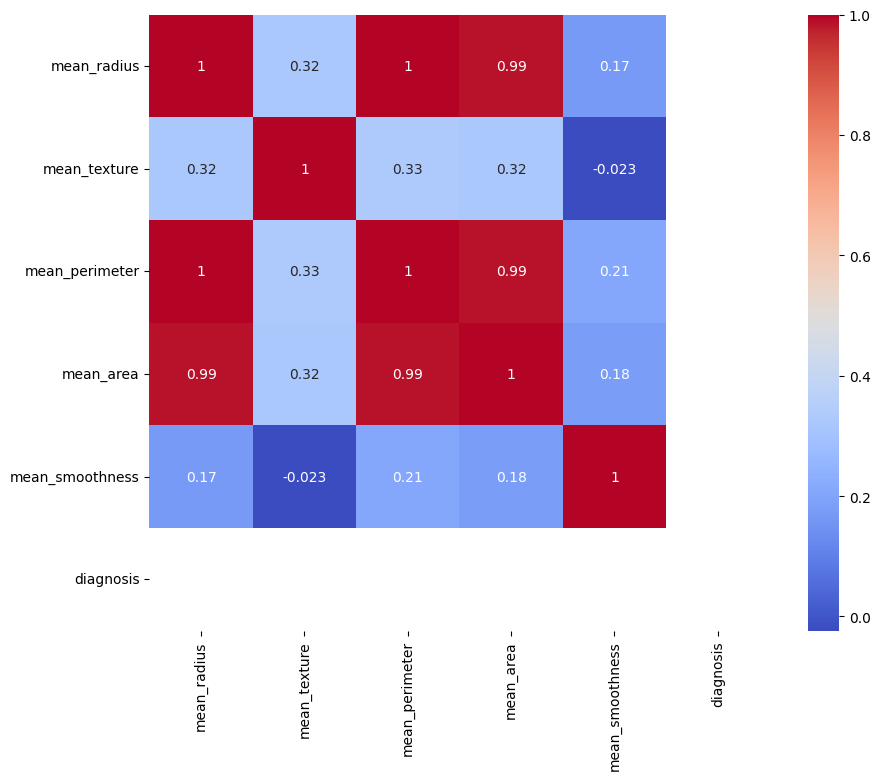

In [18]:
#correlation analysis
cor = df.corr()
#heatmap for visualization correlation analysis
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')#if we will not write annot=True then the values will not show
plt.show()

# Preprocessing

In [19]:
x=df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness']]
y=df["diagnosis"]

In [20]:
x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [21]:
y.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: diagnosis, dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)

In [23]:
#splitting data info train and test set
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2)
print(x.shape)
print(xtr.shape)
print(xts.shape)
print(y.shape)
print(ytr.shape)
print(yts.shape)

(569, 5)
(455, 5)
(114, 5)
(569,)
(455,)
(114,)


# Apply ML algo

# 1.Logistic Regression

This is a classification problem under supervised learning.This is a logistic problem because there are two classes and label is caterogrical

In [24]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [25]:
#train the model -using training data -xtr,ytr
model.fit(xtr,ytr)

ValueError: Input y contains NaN.

In [ ]:
# radius-16.65,texture-21.38,perimeter-110,area-904.6,smoothness-0.1121
new_case=[[16.65,21.38,110,904.6,0.1121]]
model.predict(new_case)

array([0], dtype=int64)

In [ ]:
#accuracy
#check perfomance of model on test data
# getting prediction for test data
ypred = model.predict(xts)
from sklearn import metrics
metrics.accuracy_score(yts,ypred)

0.956140350877193

# 2.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors = 3)#no of neighbors is hpyer parameter
model2.fit(xtr,ytr)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#accuracy
ypred2=model2.predict(xts)
metrics.accuracy_score(yts,ypred2)#here it checks for both class 1 and class 0( here 0 and 1  are told as class)

0.9210526315789473

In [ ]:
import pickle

In [ ]:
filename='cancer.pkl'

In [ ]:
pickle.dump(model2, open(filename, 'wb'))